# **HOUSE PRICE STUDY NOTEBOOK**

## Objectives

* Answer Business Requirement 1 - The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visualisations of the correlated variables against the sale price to show that.

## Inputs

* /outputs/datasets/collection/house_prices_records.csv 

## Outputs

* Create code that answers Business Requirement 1, and
* Create code that can be used to build the Streamlit App



---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-issues'

# Load Data

In [4]:
import pandas as pd
df = pd.read_csv(f"inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv")
df

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694.0,3.0,No,0,Unf,953,NaN,460,RFn,...,62.0,0.0,40,5,6,953,0.0,1999,2000,175000
1456,2073,0.0,NaN,No,790,ALQ,589,NaN,500,Unf,...,85.0,119.0,0,6,6,1542,NaN,1978,1988,210000
1457,1188,1152.0,4.0,No,275,GLQ,877,NaN,252,RFn,...,66.0,0.0,60,9,7,1152,NaN,1941,2006,266500
1458,1078,0.0,2.0,Mn,49,NaN,0,112.0,240,Unf,...,68.0,0.0,0,6,5,1078,NaN,1950,1996,142125


# Explore Data

Check data in a readable way using ProfileReport

In [5]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Findings

* There are 20 numeric values and 4 text values
* 10.2% of values are missing
* EnclosedPorch has almost 91% of missing values. WoodDeckSF has almost 90% of missing values.

# Correlation Study

First, missing values in the categorical columns are imputed with the most frequent value, and then one-hot encoding is applied to convert these categorical variables into a numerical format, as ML models require numerical input.

Then, Spearman and Pearson methods are used to assess correlation against SalePrice.

In [6]:
import pandas as pd
from feature_engine.encoding import OneHotEncoder
from sklearn.impute import SimpleImputer

# Identify categorical columns
categorical_cols = df.columns[df.dtypes == 'object'].tolist()  # Convert Index to list

# Impute missing values in categorical columns
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

# Initialize and apply the OneHotEncoder
encoder = OneHotEncoder(variables=categorical_cols, drop_last=False)
df_cs = encoder.fit_transform(df)

# Display the shape and first few rows of the transformed DataFrame
print(df_cs.shape)
df_cs.head(3)


(1460, 37)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,...,BsmtFinType1_Rec,BsmtFinType1_BLQ,BsmtFinType1_LwQ,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Fin,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa
0,856,854.0,3.0,706,150,0.0,548,2003.0,1710,8450,...,0,0,0,1,0,0,1,0,0,0
1,1262,0.0,3.0,978,284,NaN,460,1976.0,1262,9600,...,0,0,0,1,0,0,0,1,0,0
2,920,866.0,3.0,486,434,0.0,608,2001.0,1786,11250,...,0,0,0,1,0,0,1,0,0,0


* Spearman:

In [7]:
corr_spearman = df_cs.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual         0.809829
GrLivArea           0.731310
YearBuilt           0.652682
GarageArea          0.649379
TotalBsmtSF         0.602725
GarageYrBlt         0.593788
KitchenQual_TA     -0.581803
1stFlrSF            0.575408
YearRemodAdd        0.571159
GarageFinish_Unf   -0.529975
Name: SalePrice, dtype: float64

Findings from Spearman:
* Strong Correlations: OverallQual, GrLivArea

* Pearson:

In [8]:
corr_pearson = df_cs.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual       0.790982
GrLivArea         0.708624
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
YearBuilt         0.522897
KitchenQual_TA   -0.519298
YearRemodAdd      0.507101
KitchenQual_Ex    0.504094
GarageYrBlt       0.486362
Name: SalePrice, dtype: float64

Findings from Pearson:
* Strong Correlations: OverallQual, GrLivArea

* Now, we consider the most correlated variables of both Spearman and Pearson method:

In [9]:
corr_var = 5
set(corr_pearson[:corr_var].index.to_list() + corr_spearman[:corr_var].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

Findings:
* *Although we looked for 5, we got returned 6 variables. This indicates that there is no perfect overlap between the Pearson and the Spearman results. We will continue with 6 variables.*

Group top 6 variables in a list

In [10]:
vars_to_study = ['1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt']
vars_to_study

['1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt']

---

## EDA on Selected Variables

Display the selected variables from the Pearson and Spearman correlations to SalePrice

In [11]:
df_eda = df.filter(vars_to_study + ['SalePrice'])
df_eda.head()

,1stFlrSF,GarageArea,GrLivArea,OverallQual,TotalBsmtSF,YearBuilt,SalePrice
0,856,548,1710,7,856,2003,208500
1,1262,460,1262,6,1262,1976,181500
2,920,608,1786,7,920,2001,223500
3,961,642,1717,7,756,1915,140000
4,1145,836,2198,8,1145,2000,250000


Plot the selected variables against SalePrice individually:

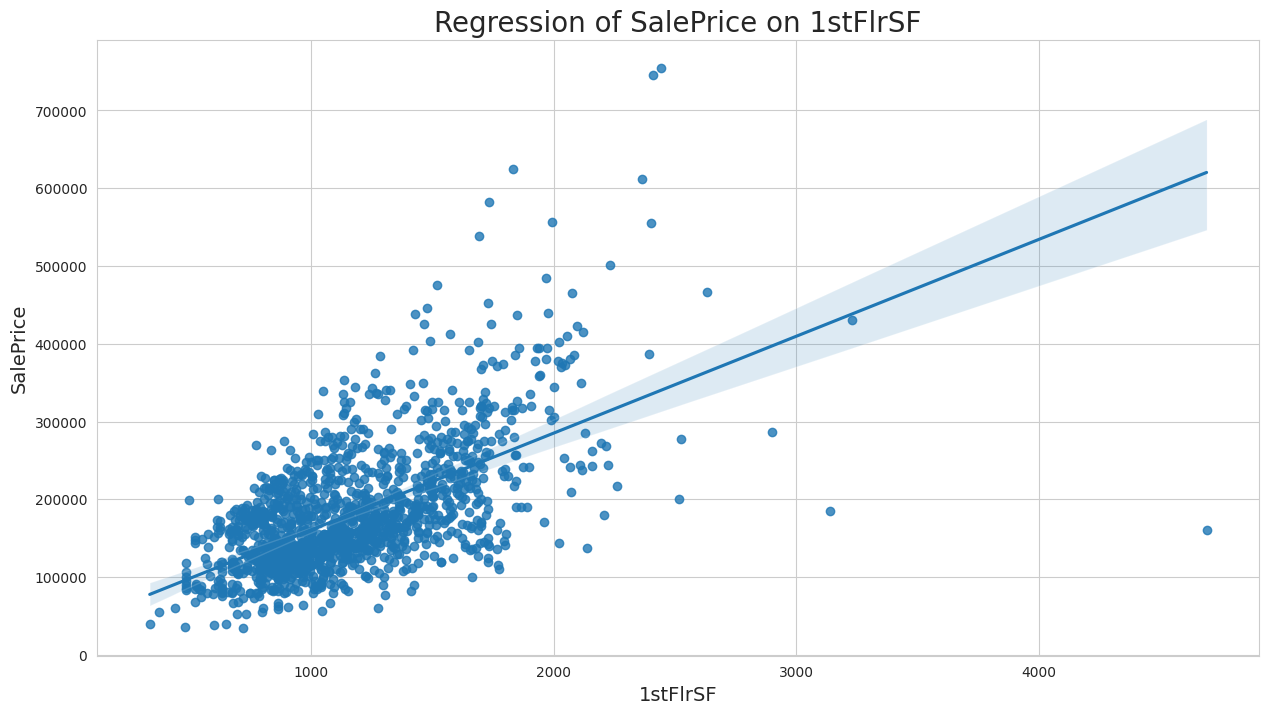

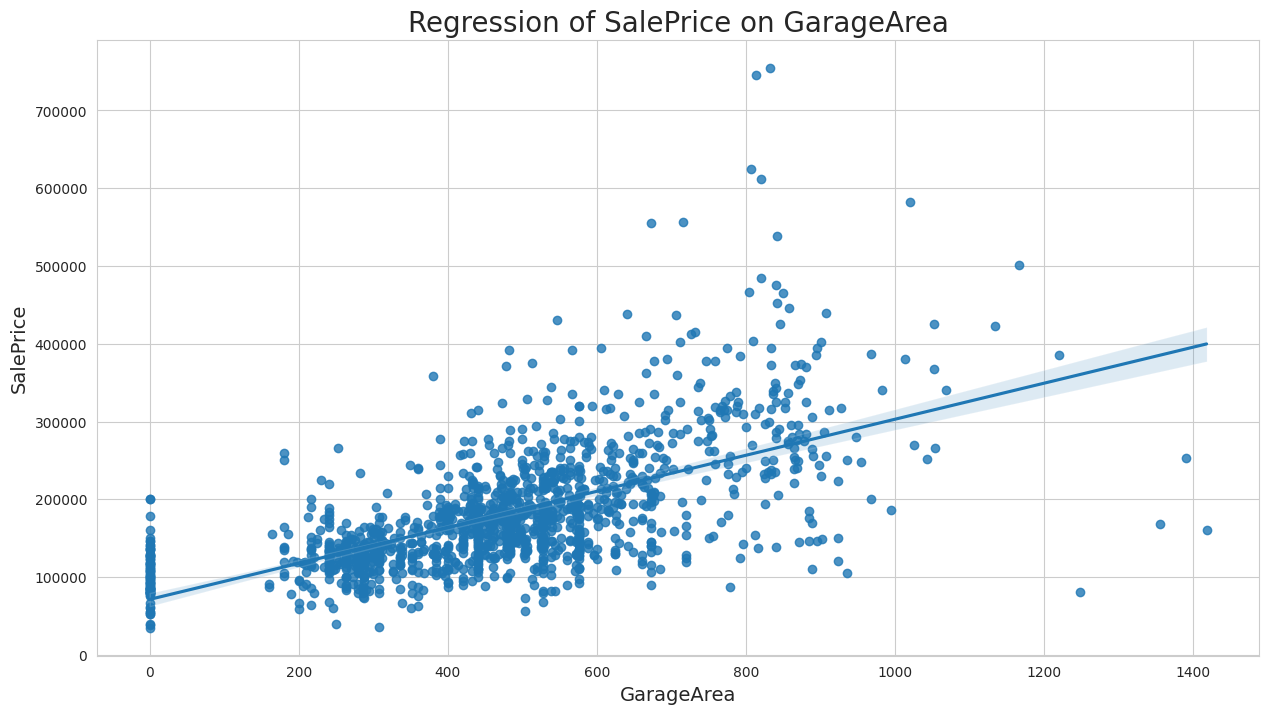

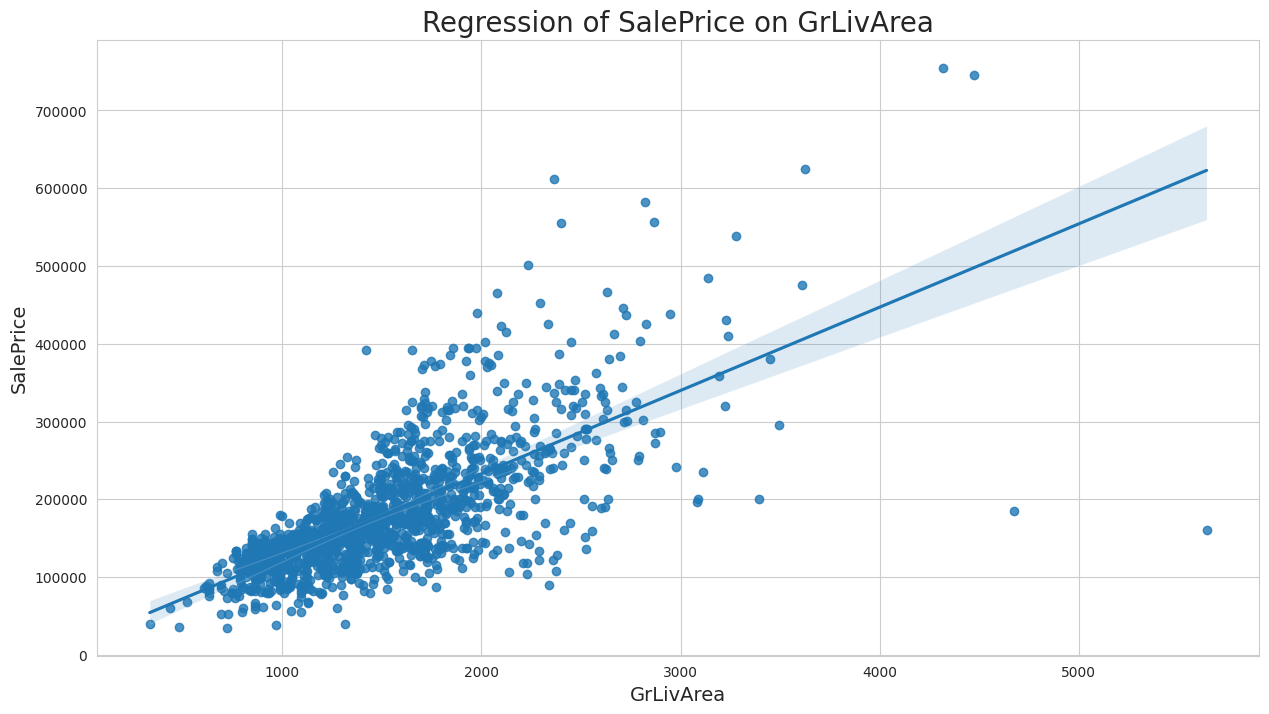

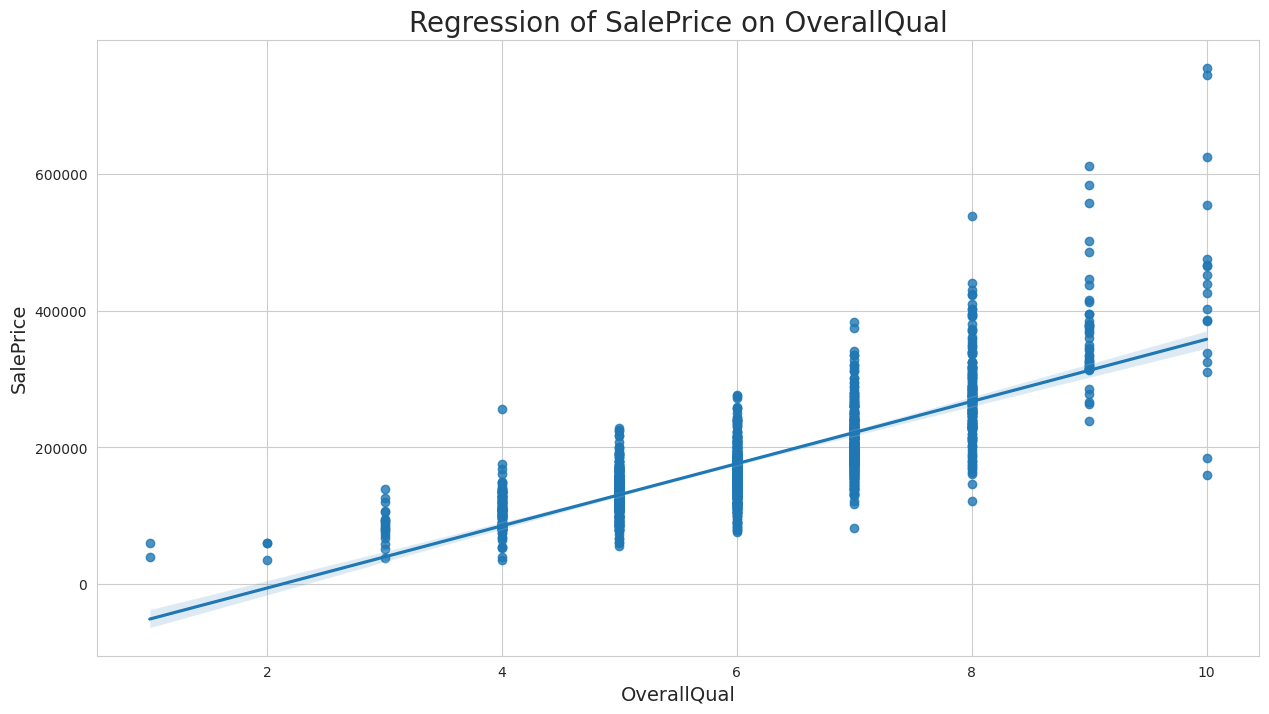

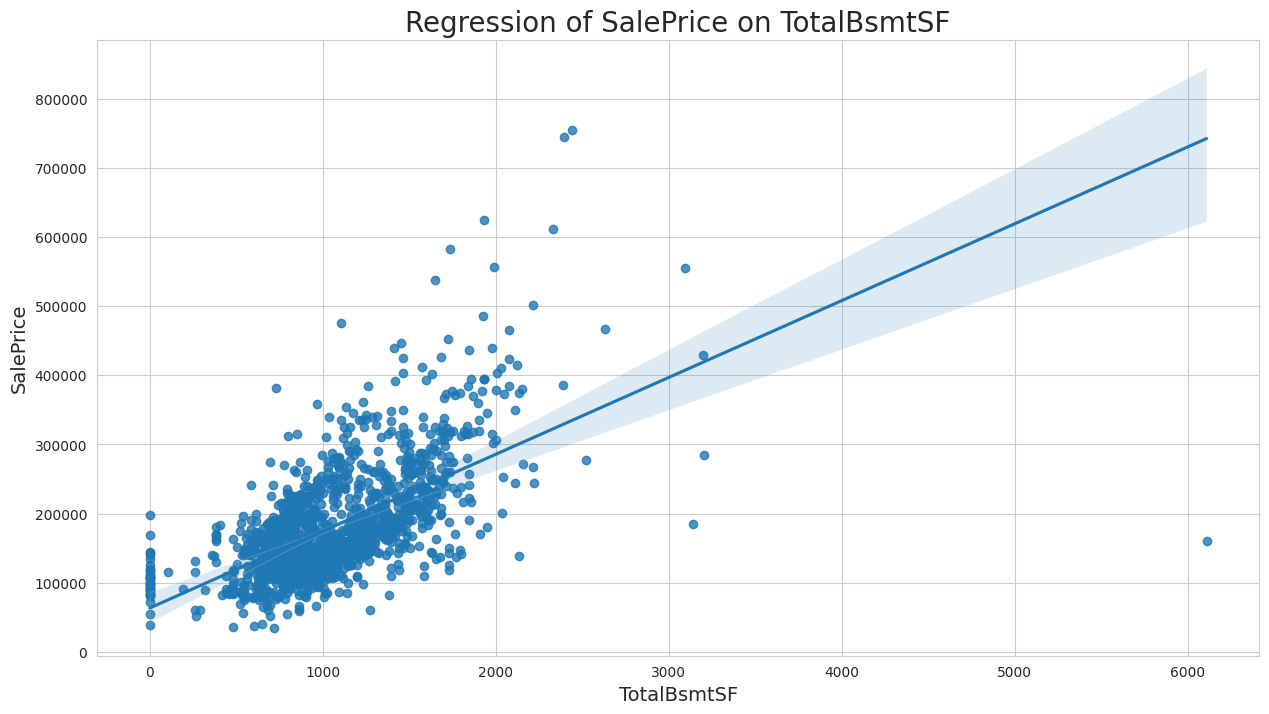

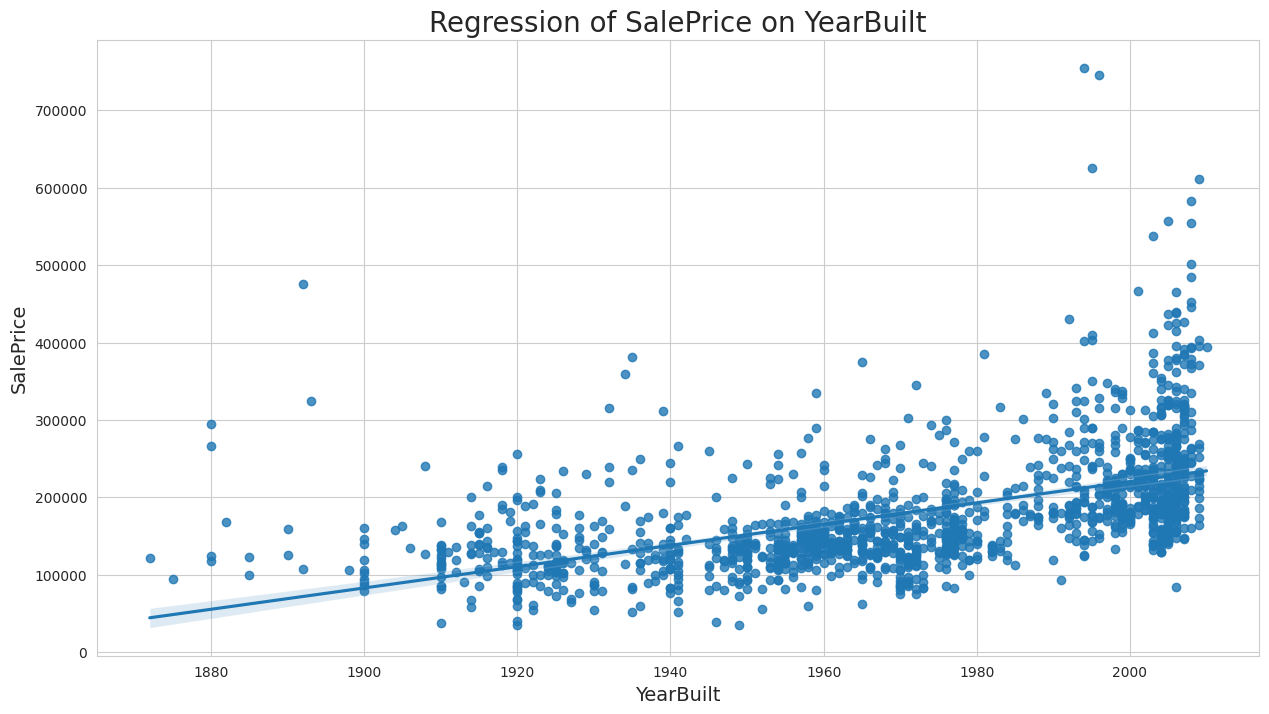

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline


def plot_numerical(df, col, target_var):
  """
    Plot a scatter plot with a regression line for a numerical variable against a target variable.
    
    Parameters:
    - df: DataFrame containing the data.
    - col: The column to plot on the x-axis.
    - target_var: The target variable to plot on the y-axis.
    """
  plt.figure(figsize=(15, 8))
  sns.regplot(data=df, x=col, y=target_var)  
  plt.title(f'Regression of {target_var} on {col}', fontsize=20)
  plt.xlabel(col, fontsize=14)
  plt.ylabel(target_var, fontsize=14)
  plt.show()


target_var = 'SalePrice'
for col in vars_to_study:
  plot_numerical(df_eda, col, target_var)
  print("\n\n")

## Findings

* The graphical analysis suggests that 'First Floor square feet' (1stFlrSF), 'Total square feet of basement area' (TotalBsmtSF), and 'Above grade (ground) living area square feet' (GrLivArea) have a strong positive correlation with SalePrice.
* It seems that 'Size of garage in square feet' (GarageArea), the overall material and finish of the house (OverallQual), and the Original construction date (YearBuilt) also have a positive correlation to SalePrice, but to a lesser extent.

---

# Push files to Repo

* This Notebook is completed
* Push changes to the workspace to GitHub
* Data Cleaning in the next workbook